# Question 1: Analyze a sneaker selling sample dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read dataset file
df = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')

In [5]:
df.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


## Data pre-processing

In [30]:
# check duplicate
if df.duplicated().sum() > 0:
    df.drop_duplicates()

# check null
if df.isnull().sum().sum() > 0:
    df.dropna()

## a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data

In [105]:
df.order_amount.describe()  # AOV = 3145.128

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

In [106]:
df.total_items.describe() 

count    5000.00000
mean        8.78720
std       116.32032
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max      2000.00000
Name: total_items, dtype: float64

In [91]:
stores = df.shop_id.unique()
print("There are total %i stores" %len(stores))

There are total 100 stores


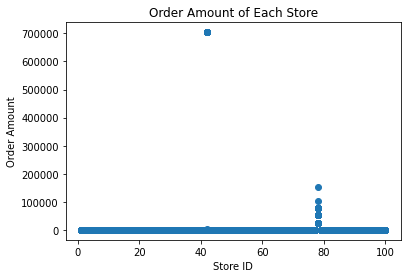

In [97]:
plt.scatter(df.shop_id, df.order_amount)
plt.title("Order Amount of Each Store")
plt.xlabel("Store ID")
plt.ylabel("Order Amount")
plt.show()

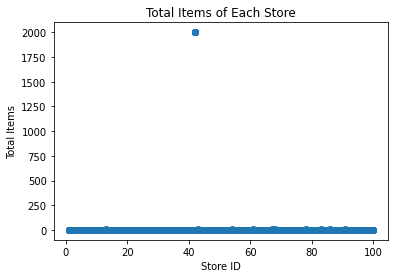

In [98]:
plt.scatter(df.shop_id, df.total_items)
plt.title("Total Items of Each Store")
plt.xlabel("Store ID")
plt.ylabel("Total Items")
plt.show()

#### From the two plots above, we can see there are some outliers in the dataset which may impact the AOV calculation.

### Step 1: Check each item price

In [92]:
# Add a new column of each item price
df['item_price'] = df.order_amount/df.total_items

# check unique price per item per store
unique_price = df.item_price.unique()
print(sorted(unique_price))

[90.0, 94.0, 101.0, 111.0, 112.0, 114.0, 116.0, 117.0, 118.0, 122.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 136.0, 138.0, 140.0, 142.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 153.0, 154.0, 155.0, 156.0, 158.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 168.0, 169.0, 171.0, 172.0, 173.0, 176.0, 177.0, 178.0, 181.0, 184.0, 187.0, 190.0, 193.0, 195.0, 196.0, 201.0, 352.0, 25725.0]


#### From the sorted unique item price, we can tell most of the item prices are below 400, there is only one item price really high. So we can use 400 as the item price threshold to find the info of the unreasonable item price.

In [84]:
unreasonable_price = df[df.item_price > 400]
unreasonable_price

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


### Step 2: Check order numbers of each transaction

In [60]:
unique_orderNum = df.total_items.unique()
unique_orderNum

array([   2,    1,    3, 2000,    4,    5,    6,    8], dtype=int64)

In [93]:
# threshold is 8
large_order = df[df.total_items > 8]
large_order

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


### Step 3: Check the order amount data of store 78 and store 42

In [103]:
df[df.shop_id == 78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


In [104]:
df[df.shop_id == 42]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,352.0
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
834,835,42,792,352,1,cash,2017-03-25 21:31:25,352.0
835,836,42,819,704,2,cash,2017-03-09 14:15:15,352.0
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45,352.0
979,980,42,744,352,1,debit,2017-03-12 13:09:04,352.0


### The store 78 sells a sneaker at 25725 per item, which is unreasonable high, this data may have been entered incorrectly. All transactions at store 78 in March 2017 had a really high order_amount value. It made a huge impact to the AOV calculation so should be treated as an outlier

### Not all transactions at store 42 have a really large total_items value. But the transactions with total_items = 2000 can misleading the AOV calculation

### Consider from the time period, this sample data contains the transaction of one month (March) which does not include discount day such as black friday, so we can ignore the impact of the discount day on AOV calculation. The sample data contains 100 different stores results, so we need to consider the location/environment factor. The order amount of stores in shopping malls is generally higher than those of stores in small towns. Combining the order amount of all stores and calculating the AOV can make the AOV result inaccurate.

## b. What metric would you report for this dataset?

### Method 1: Calculate the AOV separately by store. Because the order amount of store 78 and store 42 are special cases, calculating the order amount by store will not influence other stores' AOV results


### Method 2: Calculate the MOV (Median Order Value) instead. Average value is more susceptible to outliers, so we calculate the median which has less impact by the outliers


### Method 3: Remove the outliers. Based on the analysis, we can remove those outliers before calculating AOV

## c. What is its value?

### Method 2
#### The median order value

In [107]:
df.order_amount.median()

284.0